# Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
X = np.array([[ 0.46613554,  0.92048757],
       [-0.92129195,  0.06723639],
       [-0.15836636,  0.00430243],
       [-0.24055905, -0.87032292],
       [ 0.06245105, -0.53698416],
       [-0.2265037 , -0.43835751],
       [-0.00480479, -0.17372081],
       [-0.1525277 , -0.34399658],
       [-0.27360329,  0.35339202],
       [-0.77464508, -0.48715511],
       [-0.58724291,  0.74419972],
       [-0.97596949, -0.72172963],
       [ 0.42376225, -0.72655597],
       [ 0.96383922, -0.23371331],
       [ 0.16264643, -0.46949742],
       [-0.74294705, -0.42576417],
       [ 0.05089437, -0.20522071],
       [-0.19442744,  0.09617478],
       [-0.97102743,  0.79663992],
       [ 0.0596995 , -0.70129219],
       [-0.83934851, -0.95616033],
       [-0.38249705,  0.4973605 ],
       [ 0.3474666 ,  0.70664397],
       [ 0.35871444,  0.88679345],
       [-0.05914582,  0.23124686],
       [-0.52156643,  0.32986941],
       [-0.53579646,  0.67530208],
       [ 0.13683914, -0.96158184],
       [ 0.65904541, -0.12015303],
       [-0.69078363,  0.5615536 ],
       [ 0.47738323, -0.70919275],
       [ 0.93069669,  0.44019132],
       [ 0.19750088, -0.68869404],
       [-0.75048675, -0.18170522],
       [-0.45288395, -0.25894991],
       [-0.74644547,  0.87781953],
       [ 0.14620452,  0.56864508],
       [ 0.25719272, -0.58405476],
       [ 0.87149524,  0.01384224],
       [-0.71473576,  0.31568314],
       [-0.252637  , -0.67418371],
       [ 0.24718308,  0.95191416],
       [-0.38149953, -0.64066291],
       [-0.23112698,  0.04678807],
       [ 0.72631766,  0.7390158 ],
       [-0.91748062, -0.15131021],
       [ 0.74957917,  0.66966866],
       [ 0.76771849,  0.06662777],
       [-0.04233756, -0.91320835],
       [ 0.63840333,  0.06277738],
       [-0.78887281, -0.90311183],
       [-0.73099834, -0.69587363],
       [-0.50947652, -0.99144951],
       [ 0.14294609,  0.5474932 ],
       [ 0.4367906 ,  0.31953258],
       [-0.13970851,  0.81817884],
       [ 0.6440873 ,  0.79118775],
       [ 0.41714043, -0.66672029],
       [ 0.59283022, -0.71836746],
       [ 0.55379696,  0.98846202],
       [-0.91819517,  0.34203895],
       [ 0.02020188,  0.83696694],
       [ 0.6182918 ,  0.04254014],
       [-0.09354765, -0.30050483],
       [-0.08489545,  0.06431463],
       [-0.11886358, -0.68738895],
       [ 0.44428375,  0.18273761],
       [ 0.26486362, -0.98398013],
       [ 0.13222452,  0.91495035],
       [-0.11101656,  0.00541343],
       [-0.07696178, -0.92720555],
       [ 0.22602214,  0.56040092],
       [ 0.74227542,  0.32930104],
       [ 0.43524657,  0.35332933],
       [-0.89277607, -0.59996171],
       [-0.94836212,  0.78777302],
       [ 0.1783319 , -0.2142071 ],
       [-0.07832238, -0.25046584],
       [ 0.17611799, -0.96927832],
       [-0.95938454, -0.26504646],
       [ 0.58666766, -0.94620881],
       [-0.77336565,  0.46735057],
       [-0.94414054,  0.39044333],
       [ 0.61524645,  0.15907662],
       [-0.09855302,  0.9816656 ],
       [ 0.53937097,  0.34487634]])

In [3]:
y = ["red" if x + y > 0.3 else "green"  for [x,y] in X]


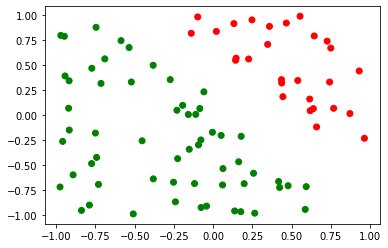

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

## Exercise

- import the support vector machine classifier from scikit-learn (the SVC class) and train a classifier for the examples above using a linear kernel;
- read the documentation to find out how to obtain the support vectors and the associated (dual) weights; use this information to analyze the learnt model: 
    - how many support vectors have been learnt? 
    - are them in the position you would have expected [[1](#note1)]? 
    - is there any margin error?
    - is there any classification error (check it using the classifier predictions)?
- learn a new SVC model using custom C values:
    - how the answers to the questions above change when you use a very high C value (e.g., 1000)?
    - how the answers to the questions above change when you use a very low C value (e.g., 0.3)?
- learn a new SVC model using a rbf kernel:
    - is the new kernel able to capture the linear model?
    - are you surprised by the above answer? Regarless to whether you are surprised or not: why?
    
<a name="note1">[1]</a> If you make two plots one after the other (in the same cell), the plots will be merged into a single one. You may want to use this feature to plot the support vectors on top of the scatter plot for the dataset.

In [5]:
def ex(clf, X, y):
    sv = clf.support_vectors_
    weights = clf.dual_coef_

    # plot support vector
    p = plt.scatter(X[:,0], X[:,1], c=y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(sv[:, 0], sv[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

    print(f"Support vectors: ⊕:{clf.n_support_[0]} ⊖:{clf.n_support_[1]}")
    print(f"Numero totale di support vectors:{len(sv)}")

    ev = clf.decision_function(sv)
    merr = []
    for i, ep in enumerate(ev):
        ep = round(-1-ep if ep < 0 else 1-ep, 3)
        if ep: merr.append(f"\tMargin error ⊖: {ep}\n")
    print(f"Margin error totali: {len(merr)}")
    print(''.join(merr))

    y_predicted = clf.predict(X)
    classification_error = len(list(filter(lambda ic: ic[1] != y[ic[0]], enumerate(y_predicted))))
    if not classification_error:
        print("Nessun errore di classificazione")

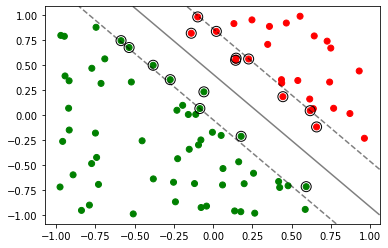

Support vectors: ⊕:8 ⊖:9
Numero totale di support vectors:17
Margin error totali: 15
	Margin error ⊖: -0.085
	Margin error ⊖: -0.028
	Margin error ⊖: -0.083
	Margin error ⊖: -0.441
	Margin error ⊖: -0.027
	Margin error ⊖: -0.258
	Margin error ⊖: -0.001
	Margin error ⊖: -0.156
	Margin error ⊖: 0.238
	Margin error ⊖: 0.222
	Margin error ⊖: 0.277
	Margin error ⊖: 0.507
	Margin error ⊖: 0.2
	Margin error ⊖: 0.007
	Margin error ⊖: 0.029

Nessun errore di classificazione



In [6]:
clf = SVC(kernel="linear")
clf.fit(X,y)
ex(clf, X, y)
print()

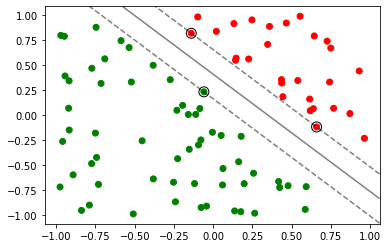

Support vectors: ⊕:1 ⊖:2
Numero totale di support vectors:3
Margin error totali: 1
	Margin error ⊖: -0.001

Nessun errore di classificazione


In [7]:
svc = SVC(kernel = 'linear', C = 1000)
ex(svc.fit(X, y), X, y)

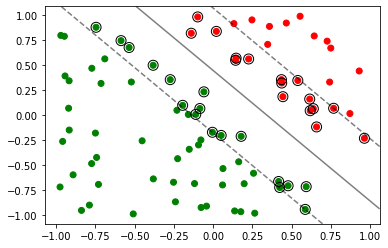

Support vectors: ⊕:17 ⊖:16
Numero totale di support vectors:33
Margin error totali: 30
	Margin error ⊖: -0.281
	Margin error ⊖: -0.251
	Margin error ⊖: -0.011
	Margin error ⊖: -0.066
	Margin error ⊖: -0.035
	Margin error ⊖: -0.284
	Margin error ⊖: -0.534
	Margin error ⊖: -0.248
	Margin error ⊖: -0.151
	Margin error ⊖: -0.132
	Margin error ⊖: -0.093
	Margin error ⊖: -0.378
	Margin error ⊖: -0.213
	Margin error ⊖: -0.064
	Margin error ⊖: -0.318
	Margin error ⊖: 0.071
	Margin error ⊖: 0.526
	Margin error ⊖: 0.496
	Margin error ⊖: 0.277
	Margin error ⊖: 0.537
	Margin error ⊖: 0.287
	Margin error ⊖: 0.695
	Margin error ⊖: 0.331
	Margin error ⊖: 0.351
	Margin error ⊖: 0.491
	Margin error ⊖: 0.343
	Margin error ⊖: 0.237
	Margin error ⊖: 0.171
	Margin error ⊖: 0.347
	Margin error ⊖: 0.032

Nessun errore di classificazione


In [8]:
svc = SVC(kernel = 'linear', C = 0.3)
ex(svc.fit(X, y), X, y)

*Notiamo che maggiore l'indice di regolarizzazione, minore il numero di errori*

Il tempo necessario al training non subisce in aumento sensibile

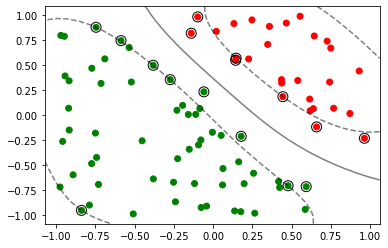

Support vectors: ⊕:9 ⊖:7
Numero totale di support vectors:16
Margin error totali: 10
	Margin error ⊖: -0.015
	Margin error ⊖: -0.429
	Margin error ⊖: -0.184
	Margin error ⊖: -0.197
	Margin error ⊖: 0.122
	Margin error ⊖: 0.216
	Margin error ⊖: 0.001
	Margin error ⊖: 0.052
	Margin error ⊖: 0.449
	Margin error ⊖: 0.132

Nessun errore di classificazione


In [10]:
rbf = SVC(kernel="rbf")
rbf.fit(X,y)
ex(rbf, X, y)

*come atteso, il rilsultato è lo stesso nonostante le classi vengano mappate su uno spazio ad infinite dimensioni.*


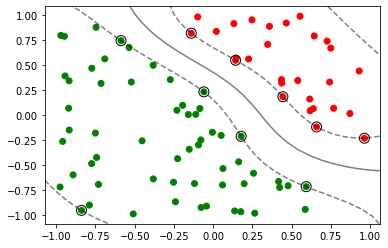

Support vectors: ⊕:5 ⊖:5
Numero totale di support vectors:10
Margin error totali: 1
	Margin error ⊖: 0.001

Nessun errore di classificazione


In [11]:
rbf = SVC(kernel="rbf", C=100)
rbf.fit(X,y)
ex(rbf, X, y)